In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data_set/ML project/zoo2.csv')
print("\nData info")
print(data.info())
print("\nData Description")
print(data.describe())


Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  43 non-null     object
 1   hair         43 non-null     int64 
 2   feathers     43 non-null     int64 
 3   eggs         43 non-null     int64 
 4   milk         43 non-null     int64 
 5   airborne     43 non-null     int64 
 6   aquatic      43 non-null     int64 
 7   predator     43 non-null     int64 
 8   toothed      43 non-null     int64 
 9   backbone     43 non-null     int64 
 10  breathes     43 non-null     int64 
 11  venomous     43 non-null     int64 
 12  fins         43 non-null     int64 
 13  legs         43 non-null     int64 
 14  tail         43 non-null     int64 
 15  domestic     43 non-null     int64 
 16  catsize      43 non-null     int64 
 17  class_type   43 non-null     int64 
dtypes: int64(17), object(1)
memory usage: 6.2+ KB
None

Data Desc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print("Sample data")
print(data.head())

Sample data
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      turtle     0         0     1     0         0        1         0   
1   chameleon     0         0     1     0         0        0         0   
2      iguana     0         0     1     0         0        0         1   
3      lizard     0         0     1     0         0        0         1   
4       gecko     0         0     1     0         0        0         0   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        0         1         1         0     0     4     1         1        1   
1        1         1         1         0     0     4     1         1        0   
2        1         1         1         0     0     4     1         1        1   
3        1         1         1         0     0     4     1         0        0   
4        1         1         1         0     0     4     1         1        0   

   class_type  
0           3  
1           3  
2       

Data Preprocessing

In [ ]:
# Check missing values
print("\nMissing values:")
print(data.isnull().sum())

# select features and target
X = data.drop(['animal_name','class_type'], axis = 1)
y = data['class_type']

# Ordinal encode the target variable 'class_type' since its categorical
encoder = OrdinalEncoder()
y = encoder.fit_transform(y.values.reshape(-1, 1)).flatten()


# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Missing values:
animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64


In [ ]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("\nData types in X_train:")
print(X_train.dtype)


Shape of X_train: (34, 16)
Shape of X_test: (9, 16)

Data types in X_train:
float64


In [ ]:
# 4. Model Creation
model = KNeighborsClassifier()

# 5. Model Training
model.fit(X_train, y_train)

# 6. Prediction
y_pred = model.predict(X_test)

In [ ]:
# 7. Model Evaluation
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred, zero_division = 0)

print("\nConfusion Matrix:\n", cm)
print("\nAccuracy Score:", accuracy)
print("\nClassification Report:\n", cr)


Confusion Matrix:
 [[2 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 3 0]
 [0 0 0 1 1]]

Accuracy Score: 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         1
         3.0       0.75      1.00      0.86         3
         4.0       1.00      0.50      0.67         2

    accuracy                           0.89         9
   macro avg       0.95      0.90      0.90         9
weighted avg       0.92      0.89      0.88         9



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Train KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Make predictions
predictions = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.14666666666666664
R² Score: 0.9325


Visualization

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/

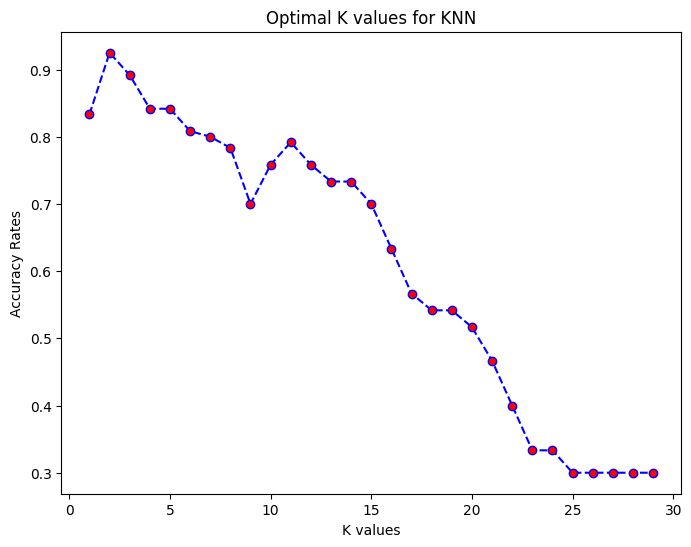


Feature Importance


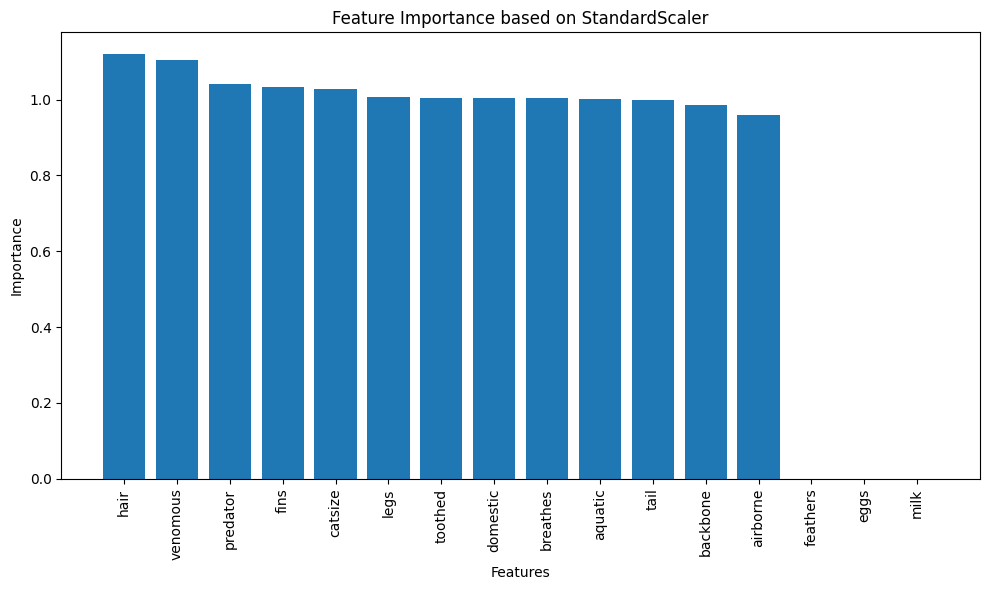

In [ ]:
# finding optimal K value
accuracy_rates = []
for i in range(1, 30):
    model_k = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(model_k, X_train, y_train, cv=10)
    accuracy_rates.append(scores.mean())

plt.figure(figsize=(8,6))
plt.plot(range(1,30), accuracy_rates, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red')
plt.xlabel("K values")
plt.ylabel("Accuracy Rates")
plt.title("Optimal K values for KNN")
plt.show()


# Feature Importance
print("\nFeature Importance")
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.std(X_train, axis = 0)}).sort_values('importance', ascending = False)
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance based on StandardScaler")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


***Insights & Stats***

Descriptive Statistics of Target Variable:
count    43.000000
mean      1.837209
std       1.462715
min       0.000000
25%       0.000000
50%       2.000000
75%       3.000000
max       4.000000
dtype: float64

Distribution of Target Variable:


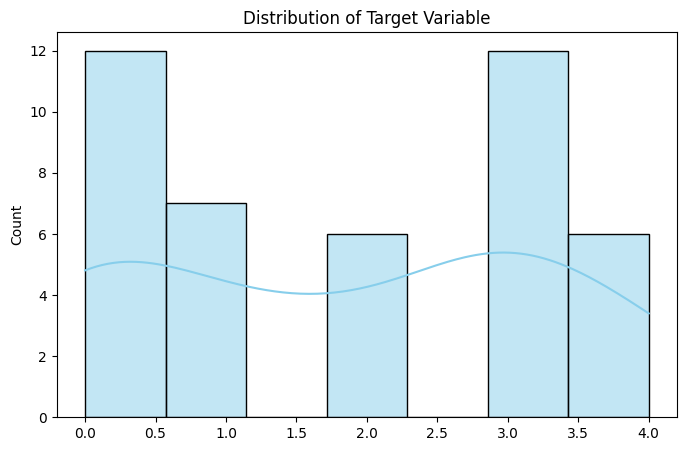


Descriptive Statistics of Numerical Features:
            hair  feathers  eggs  milk   airborne    aquatic   predator  \
count  43.000000      43.0  43.0  43.0  43.000000  43.000000  43.000000   
mean    0.023256       0.0   1.0   0.0   0.162791   0.465116   0.302326   
std     0.152499       0.0   0.0   0.0   0.373544   0.504685   0.464701   
min     0.000000       0.0   1.0   0.0   0.000000   0.000000   0.000000   
25%     0.000000       0.0   1.0   0.0   0.000000   0.000000   0.000000   
50%     0.000000       0.0   1.0   0.0   0.000000   0.000000   0.000000   
75%     0.000000       0.0   1.0   0.0   0.000000   1.000000   1.000000   
max     1.000000       0.0   1.0   0.0   1.000000   1.000000   1.000000   

         toothed   backbone   breathes   venomous       fins       legs  \
count  43.000000  43.000000  43.000000  43.000000  43.000000  43.000000   
mean    0.441860   0.581395   0.767442   0.116279   0.162791   3.209302   
std     0.502486   0.499169   0.427463   0.324353   

In [ ]:
# 9. Insights and Stats
print("\n***Insights & Stats***")

print("\nDescriptive Statistics of Target Variable:")
print(pd.Series(y).describe())


print("\nDistribution of Target Variable:")
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, color='skyblue')
plt.title("Distribution of Target Variable")
plt.show()


# Descriptive statistics of numerical features
print("\nDescriptive Statistics of Numerical Features:")
print(X.describe())